In [1]:
%load_ext autoreload
%autoreload 2
from simulator import Simulation, Simulation_soil
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
plt.style.use('presentation.mplstyle')


In [3]:
affine_r = [0.00334669*1e-3, 1.09854485*1e-3]


0.12929163703175361


Simulating:   0%|          | 0/900 [00:00<?, ?it/s]

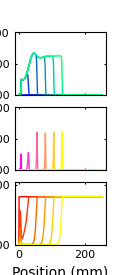

In [4]:
%matplotlib widget

adaptation_rate = 8e-4*15
length_scaling = 1.8
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(400*1.5*1.5)
nT=int(500*1.8)
# nT=1000

C0=0.004
Pprice_ideal = 3
speed = 0.1
D = 0.055*1e-1/3
D2 = 3.6

Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
ylims = [(0,10),(0,4),(0,C0*1000*1.3)]
speed_aim = speed + 2*np.sqrt(0.039*D*3)
print(speed_aim)
speed_aim = 0.15
r = affine_r[0]*speed_aim*1000 + affine_r[1] 


sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=D2,
    D=D*3,
    ylims=ylims,
    r=r,
    speed_dens = 0.15
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
# plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


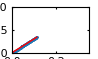

In [5]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.s_scal,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2.5*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$  \n ($\mu g/h/mm$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h/mm$)')
ax.set_ylim(0,1)
ax.set_xlim(0,0.35)

plt.savefig(os.path.join(path_figure,f'FigureAsub.pdf'), transparent=True, bbox_inches='tight')

# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
# ax.set_xlim(0,0.1)


In [ ]:
%matplotlib widget

speed = 0.18
speed_aim = speed + 2*np.sqrt(0.039*D)
speed_aim = 0.24

# r = r0 * (speed_aim/0.25)**(drag)
r = affine_r[0]*speed_aim*1000 + affine_r[1] 

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=D2,
    D=D,
    ylims=ylims,
    r=r,
    speed_dens = speed_aim
    
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2),remove_ylabels=True)
plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


Simulating:   0%|          | 0/900 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.s_scal,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2.5*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

# ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h/mm$)')
ax.set_ylim(0,1)
ax.set_xlim(0,0.35)

plt.savefig(os.path.join(path_figure,f'FigureBsub.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
def get_dynamics(speed,C0,Pprice_ideal = Pprice_ideal,D = D,speed_aim=False):
    # if not speed_aim:
    speed_aim = speed + 2*np.sqrt(0.039*D)
    r = affine_r[0]*speed_aim*1000 + affine_r[1] 
    sim = Simulation_soil(
        Length,
        nx,
        T,
        nT,
        speed=speed,
        C0=C0,
        Pprice_ideal=Pprice_ideal,
        Fmax=Vmax,
        adaptation_rate=adaptation_rate,
        D2=D2,
        D=D,
        ylims=ylims,
        r=r,
        speed_dens = 0.15
    )
    C_xt, rho_xt, n_xt,P_prices,_,_ = sim.integrate(plot=False,plot_axes = (0,1,2))
    poss = np.argmax(n_xt,axis=1)
    x = np.linspace(0,sim.T,sim.nT)
    y = np.array(poss)*sim.Length/sim.nx
    fit_coeffs = np.polyfit(x[3*sim.nT//4:], y[3*sim.nT//4:], 1)
    slope = y[-1]/x[-1]
    C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
    Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
    Pacquisitions *= 2*sim.r*np.pi
    print(np.mean(Pacquisitions))
    return(np.mean(Pacquisitions),slope)



In [ ]:
n =5
speeds_aim = np.linspace(0.15,0.32,n)
C0_values = np.exp(np.linspace(np.log(0.002), np.log(0.02),n))  # Adjust the number of points as needed
# speeds_aim = [0.1]

# C0_values = [0.06]
# dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0),D=D) 
#             for C0 in C0_values for speed in speeds}
# dynamics = {(speed_aim, C0): get_dynamics(get_base_speed(C0,speed_aim), C0=C0, Pprice_ideal=Pprice_ideal,D=D,speed_aim = speed_aim) 
#             for C0 in C0_values for speed_aim in speeds_aim}
dynamics = {(speed_aim, C0): get_dynamics(speed_aim, C0=C0, Pprice_ideal=Pprice_ideal,D=D) 
            for C0 in C0_values for speed_aim in speeds_aim}

In [ ]:
bp = 239
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds_aim:
    for C0 in C0_values:
        Pacquis,speed_observed = dynamics[(speed,C0)]
        # Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        # Pacquisitions *= 2*sim.r*np.pi
        Pacqu[(speed,speed_observed,C0)] = Pacquis

In [ ]:
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed_imposed,speed_observed, C0 = key
    data_for_df.append({'speed_imposed': speed_imposed,'speed_observed': speed_observed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

def to_three_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed_imposed'] = (df['speed_imposed'].apply(to_two_significant_digits)*1000).astype(int)
df['speed_observed'] = (df['speed_observed'].apply(to_two_significant_digits)*1000).astype(int)

df['C0'] = ((df['C0']*1000).apply(to_three_significant_digits))



In [ ]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_imposed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB_new.pdf'), transparent=True, bbox_inches='tight')
